# <center>Car Brand Classification 

In [251]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [252]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [253]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

#### Using glob to see how the images are stored in each sub-folders

In [254]:
import glob 
# Returns a list of names in list files. 
print("Using glob.glob()") 
files = glob.glob('Datasets/train/**/*.jpg',  
                   recursive = True) 
for file in files: 
    print(file) 

Using glob.glob()
Datasets/train\Audi\1.jpg
Datasets/train\Audi\10.jpg
Datasets/train\Audi\11.jpg
Datasets/train\Audi\12.jpg
Datasets/train\Audi\13.jpg
Datasets/train\Audi\14.jpg
Datasets/train\Audi\15.jpg
Datasets/train\Audi\16.jpg
Datasets/train\Audi\17.jpg
Datasets/train\Audi\18.jpg
Datasets/train\Audi\19.jpg
Datasets/train\Audi\2.jpg
Datasets/train\Audi\20.jpg
Datasets/train\Audi\21.jpg
Datasets/train\Audi\22.jpg
Datasets/train\Audi\23.jpg
Datasets/train\Audi\24.jpg
Datasets/train\Audi\25.jpg
Datasets/train\Audi\26.jpg
Datasets/train\Audi\27.jpg
Datasets/train\Audi\28.jpg
Datasets/train\Audi\29.jpg
Datasets/train\Audi\3.jpg
Datasets/train\Audi\30.jpg
Datasets/train\Audi\31.jpg
Datasets/train\Audi\32.jpg
Datasets/train\Audi\33.jpg
Datasets/train\Audi\34.jpg
Datasets/train\Audi\35.jpg
Datasets/train\Audi\36.jpg
Datasets/train\Audi\37.jpg
Datasets/train\Audi\38.jpg
Datasets/train\Audi\39.jpg
Datasets/train\Audi\4.jpg
Datasets/train\Audi\40.jpg
Datasets/train\Audi\41.jpg
Datasets/train

Datasets/train\LandRover\48.jpg
Datasets/train\LandRover\49.jpg
Datasets/train\LandRover\5.jpg
Datasets/train\LandRover\50.jpg
Datasets/train\LandRover\6.jpg
Datasets/train\LandRover\7.jpg
Datasets/train\LandRover\8.jpg
Datasets/train\LandRover\9.jpg
Datasets/train\McLaren\1.jpg
Datasets/train\McLaren\10.jpg
Datasets/train\McLaren\11.jpg
Datasets/train\McLaren\12.jpg
Datasets/train\McLaren\13.jpg
Datasets/train\McLaren\14.jpg
Datasets/train\McLaren\15.jpg
Datasets/train\McLaren\16.jpg
Datasets/train\McLaren\17.jpg
Datasets/train\McLaren\18.jpg
Datasets/train\McLaren\19.jpg
Datasets/train\McLaren\2.jpg
Datasets/train\McLaren\20.jpg
Datasets/train\McLaren\21.jpg
Datasets/train\McLaren\22.jpg
Datasets/train\McLaren\23.jpg
Datasets/train\McLaren\24.jpg
Datasets/train\McLaren\25.jpg
Datasets/train\McLaren\26.jpg
Datasets/train\McLaren\27.jpg
Datasets/train\McLaren\28.jpg
Datasets/train\McLaren\29.jpg
Datasets/train\McLaren\3.jpg
Datasets/train\McLaren\30.jpg
Datasets/train\McLaren\31.jpg
Da

In [255]:
import os
dir_path = "Datasets/train"
categories=[]
class_counts=[]
for i in os.listdir(dir_path):
    print("No of Images in ",i," category is ",len(os.listdir(os.path.join(dir_path,i))))
    categories.append(i)
    class_counts.append(len(os.listdir(os.path.join(dir_path,i))))

No of Images in  Audi  category is  50
No of Images in  AustinMartin  category is  50
No of Images in  Bentley  category is  50
No of Images in  BMW  category is  50
No of Images in  BugattiVeyron  category is  50
No of Images in  Cadillac  category is  50
No of Images in  Chevrolet  category is  50
No of Images in  Chrysler  category is  50
No of Images in  Dodge  category is  50
No of Images in  Ferrari  category is  50
No of Images in  FIAT  category is  50
No of Images in  Honda  category is  49
No of Images in  Hummer  category is  50
No of Images in  Hyundai  category is  49
No of Images in  Jaguar  category is  50
No of Images in  Jeep  category is  50
No of Images in  Lamborghini  category is  50
No of Images in  LandRover  category is  50
No of Images in  McLaren  category is  50
No of Images in  Mercedes  category is  50
No of Images in  Nissan  category is  49
No of Images in  Porsche  category is  50
No of Images in  RollsRoyce  category is  50
No of Images in  Toyota  cate

### Visualization to check whether the dataset is balanced or not

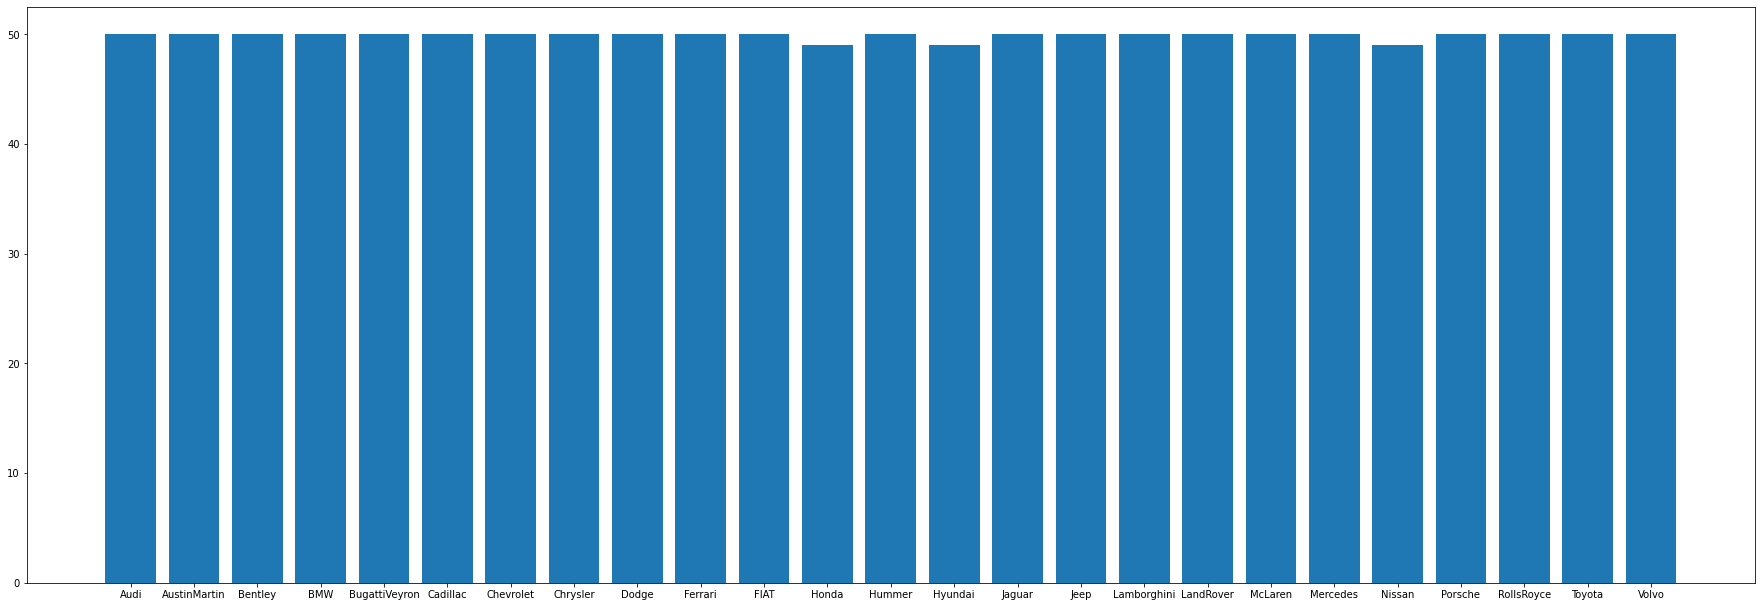

In [256]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([4,4,4,2])
langs = categories
students = class_counts
ax.bar(langs,students)
plt.show()

<b> We can clearly see that each category has atmost same number of images that is we are having about 50 images from each category so the data is absolutely balanced

<b> Using basic_image_eda to look after the heights and widths of images in the dataset

In [257]:
from basic_image_eda import BasicImageEDA

if __name__ == "__main__":  # for multiprocessing
    data_dir = "Datasets/train"
    BasicImageEDA.explore(data_dir)

  0%|                                                                                         | 0/1247 [00:00<?, ?it/s]


found 1247 images.
Using 12 threads. (max:12)



100%|██████████████████████████████████████████████████████████████████████████████| 1247/1247 [00:16<00:00, 76.89it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  1247

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  98
max height                               |  3456
mean height                              |  496.8067361668003
median height                            |  411

min width                                |  160
max width                                |  4608
mean width                               |  728.6134723336006
median width                             |  630

mean height/width ratio                  |  0.6818522509275453
median height/width ratio                |  0.6523809523809524
recommended input size(by mean)          |  [496 728] (h x w, multiples of 8)
recommended input size(by mean)          |  [496 736] (h x w, multiples of 16)
recommended

### Displaying several  images

uint8
(355, 710, 3)


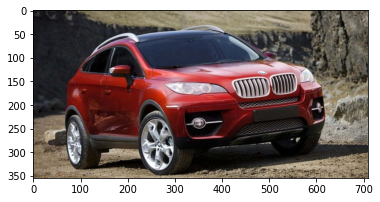

In [258]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread('Datasets/train/BMW/20.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

uint8
(416, 625, 3)


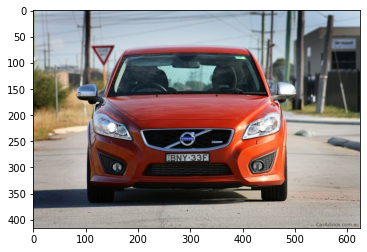

In [259]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread('Datasets/train/volvo/20.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

uint8
(417, 628, 3)


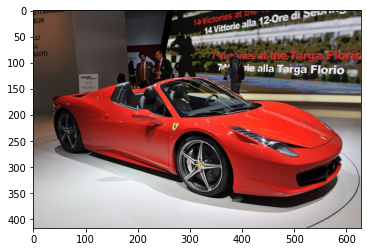

In [260]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread('Datasets/train/ferrari/20.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

uint8
(168, 300, 3)


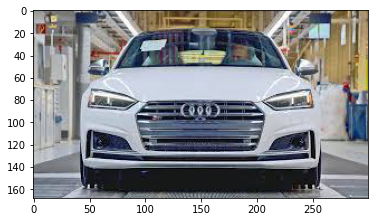

In [261]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread('Datasets/train/Audi/20.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

uint8
(194, 259, 3)


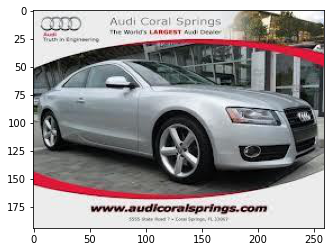

In [262]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread('Datasets/train/Audi/25.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

uint8
(1536, 2048, 3)


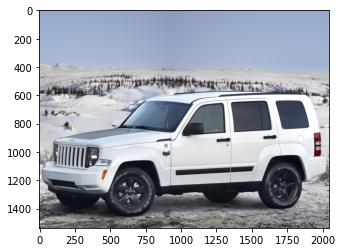

In [263]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread('Datasets/train/Jeep/25.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

uint8
(386, 600, 3)


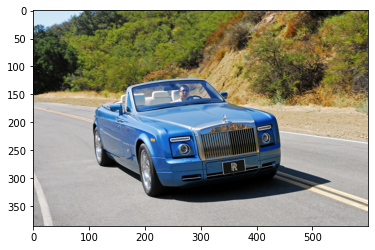

In [264]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread('Datasets/train/RollsRoyce/25.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

From the above images we can see that some images are having only their front-view and some other are having their rear view and some are viewed sideways and some of them are having only their brand-logo displayed and some are only described by the structure that is visible as we can clearly see that some cars have a soft blend whereas others have a truck like blend.

#### Displaying the original size of the image

(600, 386)


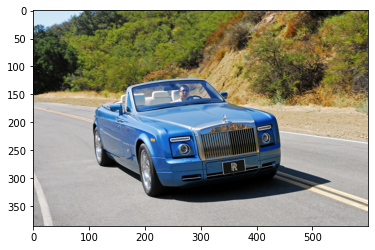

In [265]:
# create a thumbnail of an image
from PIL import Image
# load the image
image = Image.open('Datasets/train/RollsRoyce/25.jpg')
# report the size of the image
print(image.size)
pyplot.imshow(data)
pyplot.show()
# # create a thumbnail and preserve aspect ratio
# image.thumbnail((100,100))
# # report the size of the thumbnail
# print(image.size)

We can see that the image is of size (600,386) which means the height is 600 and the width is 386

In [266]:
# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()
# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()


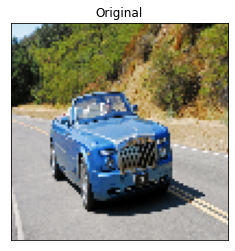

In [267]:
from PIL import Image  
im1 = Image.open(r"Datasets/train/RollsRoyce/25.jpg")  
original = im1
newsize = (100, 100) 
im1 = im1.resize(newsize) 
display_one(im1)

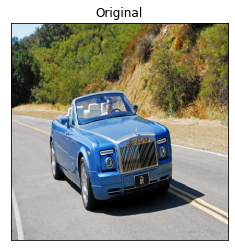

In [268]:
from PIL import Image  
im1 = Image.open(r"Datasets/train/RollsRoyce/25.jpg")  
original = im1
newsize = (400, 400) 
im1 = im1.resize(newsize) 
display_one(im1)

Here we can see that when we try to resize images they may blur or not clearly visible

Here we have also observed that the original size of each image is different that is the height and width of each image is different which means it may lead that that some images have higher sizes while the others have lower so here comes the process of resizing each image to the similar size.

### we can also try to crop images and visualize them 

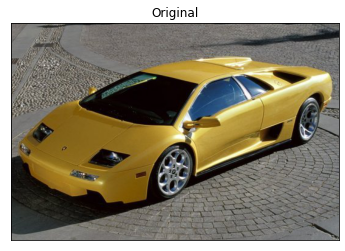

In [269]:
from PIL import Image  
im1 = Image.open(r"Datasets/train/Lamborghini/25.jpg")  
original = im1
display_one(im1)

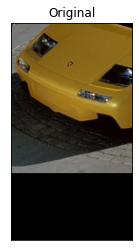

In [270]:
# Setting the points for cropped image  
height=600
left = 6
top = height / 4
right = 174
bottom = 3 * height / 4
from PIL import Image  
im1 = Image.open(r"Datasets/train/Lamborghini/25.jpg")  
# Cropped image of above dimension  
# (It will not change orginal image)  
im1 = im1.crop((left, top, right, bottom)) 
original = im1
display_one(im1)

Here above we can see some cropped images of Lamborghini this shows that images may even be visualized this way and may also appear in this way.

In [271]:
len(files)

1247

<b> As in all the above images we have seen whether the sizes of all the given images are same or different so now we need to resize them in a way so that all would be in a same manner and our model recognizes all the images similarly

<b>Now we will try to visualize only one image intutitively

In [272]:
import os

import imageio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import PIL
from PIL import Image
import skimage
import skimage.color

%matplotlib inline

In [273]:
img_path="Datasets/train/ferrari/22.jpg"
img = mpimg.imread(img_path)

<b>plotting the image with matplotlib

Text(0.5, 1.0, 'Original image')

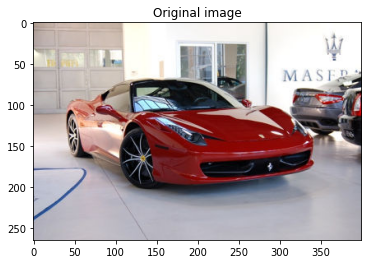

In [274]:
plt.imshow(img)
plt.title('Original image')

<b>Visualizing this in grayscale

Text(0.5, 1.0, 'Grayscale')

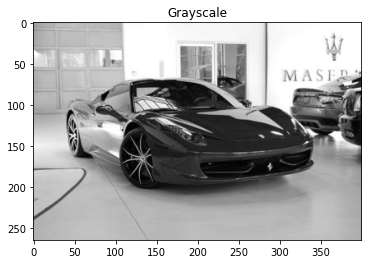

In [275]:
img_gray = skimage.color.rgb2gray(img)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale')

<b> defining a function to plot image and histogram

In [276]:
#reference: https://www.kaggle.com/ksaaskil/image-processing-with-scikit-image
from skimage import exposure
from functools import partial

# http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html#sphx-glr-auto-examples-color-exposure-plot-equalize-py
def plot_img_and_hist(image, axes=None, bins=64, title=None):
    """Plot an image along with its histogram and cumulative histogram.

    """
    if axes is None:
        fig, axes = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1.5, 1]})
        fig.set_size_inches((8, 4))
        # fig.tight_layout()
    ax_img, ax_hist = axes
    # ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    
    if title is not None:
        ax_img.set_title(title)

    # Display histograms per channel
    red = image[:, :, 0]
    green = image[:, :, 1]
    blue = image[:, :, 2]
    
    plot_hist = partial(ax_hist.hist, bins=bins, histtype='bar', linewidth=2, alpha=0.3, density=True)
    plot_hist(red.ravel(), color='red')
    plot_hist(green.ravel(), color='green')
    plot_hist(blue.ravel(), color='blue')

    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_ylim([0, 3])
    ax_hist.set_yticks([])
    
    ax_hist.set_title('Histogram')

    # Display cumulative distribution
    # img_cdf, bins = exposure.cumulative_distribution(image, bins)
    # ax_cdf.plot(bins, img_cdf, 'r')
    # ax_cdf.set_yticks([])

    return ax_img, ax_hist # , ax_cdf


<b> here we will try to check the intensity after being rescaled

(<AxesSubplot:title={'center':'Rescaled intensity'}>,
 <AxesSubplot:title={'center':'Histogram'}, xlabel='Pixel intensity'>)

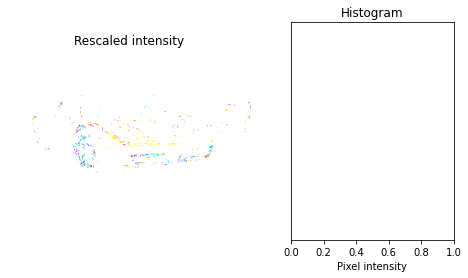

In [277]:
low = 0.10  # Pixels with intensity smaller than this will be black
high = 0.90  # Pixels with intensity larger than this will be white
img_rescaled = exposure.rescale_intensity(img, in_range=(low, high))
plot_img_and_hist(img_rescaled, title='Rescaled intensity')

<b>As we cannot observe the histogram in the above image so we will try to plot a equalized histogram

(<AxesSubplot:title={'center':'Equalized histogram'}>,
 <AxesSubplot:title={'center':'Histogram'}, xlabel='Pixel intensity'>)

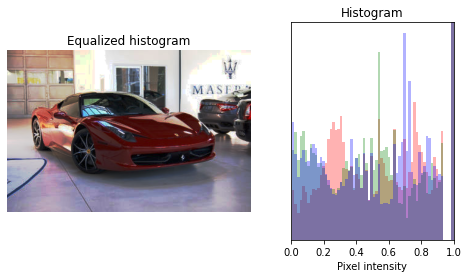

In [278]:
img_eq = exposure.equalize_hist(img)
plot_img_and_hist(img_eq, title='Equalized histogram')

<b>Contrast limited adaptive histogram

(<AxesSubplot:title={'center':'Adaptive histogram equalization'}>,
 <AxesSubplot:title={'center':'Histogram'}, xlabel='Pixel intensity'>)

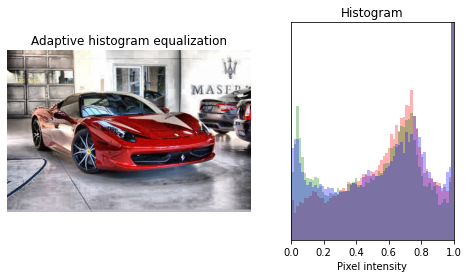

In [279]:
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
plot_img_and_hist(img_adapteq, title='Adaptive histogram equalization')

<b>Using Pillow library to visualize images

Original image bounding box: (0, 0, 1024, 768)
Post-crop bounding box: (0, 0, 150, 100)
Post-resize bounding box: (0, 0, 600, 400)


Text(0.5, 1.0, 'Image after cropping, resizing and rotating')

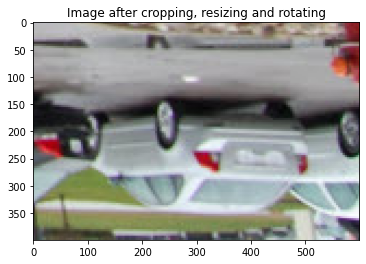

In [280]:
img_path="Datasets/train/volvo/2.jpg"
img = PIL.Image.open(img_path)

# Print bounding box
print('Original image bounding box:', img.getbbox())

# Cropping
img = img.crop((0, 0, 150, 100))

# Print bounding box
print('Post-crop bounding box:', img.getbbox())

# Resize
img = img.resize((600, 400), resample=PIL.Image.NEAREST)

# Print bounding box
print('Post-resize bounding box:', img.getbbox())

# Rotate image
img = img.rotate(180)

# Show
plt.imshow(img)
plt.title('Image after cropping, resizing and rotating')

In [281]:
# even we can get these images into numpy arrays that can be useful
# Get image as list of pixel values
arr = list(img.getdata())

# Reshape to 3D (numpy) array, note that img.size[0] is width and img.size[1] is height
img_np = np.array(arr).reshape((img.size[1], img.size[0], 3))

print('Numpy array shape:', img_np.shape)

Numpy array shape: (400, 600, 3)


<b>Important conclusions drawn from visualizations

<b>
1.Thus we have done several visualizations of images and even tried to augment and check those images by rotating,flipping and cropping<br>
2. And we also tried to check the dataset is balanced or not by plotting the number of images in each class and we found that the the dataset is balnced and there are about 50 images in each class <br>
3. And we also observed that sizes of each image are mostly different so we need to bring all the images to same sizes and generate several other images by augmentation inorder to train our model perfectly.

<b>Importing Libraries

In [282]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [283]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

<b>Resizing Images

In [284]:
# re-size all the images to [224,224]
IMAGE_SIZE = [256, 256]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

### Implementing a base model using keras

In [285]:
# reference- from my callbacks assignment
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
from tensorflow import keras
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder 
import tensorflow as tf 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score 
import matplotlib.pyplot as plt 
from tqdm import tqdm 
import datetime
import keras 
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_extraction.text import TfidfVectorizer 
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.initializers import RandomUniform 
from keras import initializers, optimizers 
from keras.utils import np_utils 
from keras.callbacks import ModelCheckpoint, EarlyStopping,LearningRateScheduler,TensorBoard

In [286]:
# tensor-board in colab
# Refer: https://www.tensorflow.org/tensorboard/get_started
import os
import datetime

! rm -rf ./logs/ 
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
print(logdir)
%load_ext tensorboard
# %tensorboard --logdir $logdir

logs\20210318-192222
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'rm' is not recognized as an internal or external command,
operable program or batch file.


In [287]:
class TerminateNaN(tf.keras.callbacks.Callback):
        
    def on_epoch_end(self, epoch, logs={}):
        loss = logs.get('loss')
#         weights=model1.get_weights()
        w=self.model.trainable_weights
        if loss is not None:
            if np.isnan(loss) or np.isinf(loss) or w==None:
                print("Invalid loss and terminated at epoch {}".format(epoch))
                self.model.stop_training = True

In [288]:
#https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback
class RocCallback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]


    def on_train_begin(self, logs={}):
        return

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        y_pred_train = self.model.predict_proba(self.x)
        roc_train = roc_auc_score(self.y, y_pred_train)
        y_pred_val = self.model.predict_proba(self.x_val)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        print('\rroc-auc_train: %s - roc-auc_val: %s' % (str(round(roc_train,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return




In [289]:
import math
def step_decay(epoch):
   lrate = 0.1
   drop = 0.05
   epochs_drop = 3.0
   if epoch % 3==0:
       lrate =  lrate * math.pow(drop,math.floor((1+epoch)/epochs_drop))
           
   else:
        lrate=lrate
   return lrate
lrate = LearningRateScheduler(step_decay)

In [290]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

!rm -rf ./logs/ 

keras.backend.clear_session()
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(IMAGE_SIZE + [3])))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


'rm' is not recognized as an internal or external command,
operable program or batch file.


In [291]:
terminate = TerminateNaN()

# https://medium.com/@italojs/saving-your-weights-for-each-epoch-keras-callbacks-b494d9648202
checkpoint = ModelCheckpoint("best_model1.hdf5", monitor='accuracy', verbose=1,
save_best_only=True, mode='auto', period=1)

# # set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

# Tensorbaor
! rm -rf ./logs/ 
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
%tensorboard --logdir $logdir


tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

optimizer=optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

'rm' is not recognized as an internal or external command,
operable program or batch file.


ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 14820.

In [292]:
# # tell the model what cost and optimization method to use
# model.compile(
#   loss='categorical_crossentropy',
#   optimizer='adam',
#   metrics=['accuracy']
# )


In [293]:
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

<b> Image preprocessing and data augmentation

In [294]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

<b>Gettinng the train set of data

In [295]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (256, 256),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 1247 images belonging to 25 classes.


<b>Getting the test set of data

In [296]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (256, 256),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 546 images belonging to 25 classes.


<b>Fitting the base model on train set

In [297]:

# model1.fit(X_train, 
#           y_train,  
#           epochs=20, # more epochs
#           validation_data=(X_test,y_test),
#           callbacks=[terminate,early_stopping_monitor,tensorboard_callback,checkpoint,roc,loss_history,lrate])

In [298]:
# fit the model
model_fit= model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[terminate,early_stopping_monitor,tensorboard_callback,checkpoint,lrate]
)

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 1.1921e-07 - accuracy: 0.8722
Epoch 00001: accuracy improved from -inf to 0.87221, saving model to best_model1.hdf5
20/20 [==============================] - 69s 3s/step - loss: 1.1921e-07 - accuracy: 0.8722 - val_loss: 1.1921e-07 - val_accuracy: 0.9600
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 1.1921e-07 - accuracy: 0.8715
Epoch 00002: accuracy did not improve from 0.87221
20/20 [==============================] - 68s 3s/step - loss: 1.1921e-07 - accuracy: 0.8715 - val_loss: 1.1921e-07 - val_accuracy: 0.9600
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 1.1921e-07 - accuracy: 0.8752
Epoch 00003: accuracy improved from 0.87221 to 0.87516, saving model to best_model1.hdf5
20/20 [==============================] - 69s 3s/step - loss: 1.1921e-07 - accuracy: 0.8752 - val_loss: 1.1921e-07 - val_accuracy: 0.9600
Epoch 4/100
20/20 [==============================] - ETA: 0s - los

<b> Here we can clearly see that the accuracy is low as we have trained on small dataset and our model is even a smaller convnet so now we can also try to implement the data on pretrained models like VGG16 and VGG19 and others so that we may have better accuracy as the pretrained models that we get in keras are very well trained on imagenet data which is a larger one and the number of layers and number of parameters are very high which give them a strong build.<br>
    Here the the building of smaller model is depending completely on the resources if we need to build the model more efficiently we can try to implement deeper networks or use transfer learning for this.

In [299]:
# # plot the accuracy
# plt.plot(model_fit.history['accuracy'], label='train acc')
# plt.plot(model_fit.history['val_accuracy'], label='val acc')
# plt.legend()
# plt.show()
# plt.savefig('AccVal_acc')

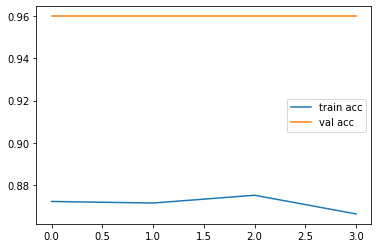

<Figure size 432x288 with 0 Axes>

In [300]:
# plot the accuracy
plt.plot(model_fit.history['accuracy'], label='train acc')
plt.plot(model_fit.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [301]:
y_pred = model.predict(test_set)

In [302]:
y_pred

array([[0.47641844],
       [0.4706008 ],
       [0.47928816],
       [0.4738758 ],
       [0.46084538],
       [0.45637336],
       [0.47481072],
       [0.45803687],
       [0.45582214],
       [0.462294  ],
       [0.46242592],
       [0.4599507 ],
       [0.4674163 ],
       [0.47921047],
       [0.4447185 ],
       [0.47276133],
       [0.47543588],
       [0.47272623],
       [0.48310712],
       [0.46454543],
       [0.46136832],
       [0.48576906],
       [0.46807724],
       [0.45047438],
       [0.4615315 ],
       [0.4860805 ],
       [0.47972935],
       [0.44671342],
       [0.46360973],
       [0.46548027],
       [0.47723144],
       [0.47438282],
       [0.44212344],
       [0.45099646],
       [0.47154155],
       [0.46870288],
       [0.4543074 ],
       [0.4587032 ],
       [0.44779772],
       [0.46807697],
       [0.45041016],
       [0.45186105],
       [0.47229105],
       [0.47067013],
       [0.47543293],
       [0.4616872 ],
       [0.46724212],
       [0.467

<b> Confusion matrix

In [303]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [304]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_set , len(training_set))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set .classes, y_pred))
print('Classification Report')
target_names = ['Audi',
 'AustinMartin',
 'Bentley',
 'BMW',
 'BugattiVeyron',
 'Cadillac',
 'Chevrolet',
 'Chrysler',
 'Dodge',
 'Ferrari',
 'FIAT',
 'Honda',
 'Hummer',
 'Hyundai',
 'Jaguar',
 'Jeep',
 'Lamborghini',
 'LandRover',
 'McLaren',
 'Mercedes',
 'Nissan',
 'Porsche',
 'RollsRoyce',
 'Toyota',
 'Volvo']
print(classification_report(test_set .classes, y_pred, target_names=target_names))

Confusion Matrix
[[16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [13  0  0  0  0  0  0 

In [305]:
# Test data Accuracy


<b>Now we will try to  implement our Transfer Learning Model

Here we will try to convert the image size as image_size+3 so that we will get our RGB implementation here as our three layers<br>
Here we will use the weights of our Imagenet from our pretrained Resnet50 model

<b>1.ResNet50

In [306]:
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

Here we should train our layers as we are using the model that is pretrained

In [307]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

<b>Checking the number of output classes

In [308]:
folders = glob('Datasets/train/*')
folders

['Datasets/train\\Audi',
 'Datasets/train\\AustinMartin',
 'Datasets/train\\Bentley',
 'Datasets/train\\BMW',
 'Datasets/train\\BugattiVeyron',
 'Datasets/train\\Cadillac',
 'Datasets/train\\Chevrolet',
 'Datasets/train\\Chrysler',
 'Datasets/train\\Dodge',
 'Datasets/train\\Ferrari',
 'Datasets/train\\FIAT',
 'Datasets/train\\Honda',
 'Datasets/train\\Hummer',
 'Datasets/train\\Hyundai',
 'Datasets/train\\Jaguar',
 'Datasets/train\\Jeep',
 'Datasets/train\\Lamborghini',
 'Datasets/train\\LandRover',
 'Datasets/train\\McLaren',
 'Datasets/train\\Mercedes',
 'Datasets/train\\Nissan',
 'Datasets/train\\Porsche',
 'Datasets/train\\RollsRoyce',
 'Datasets/train\\Toyota',
 'Datasets/train\\Volvo']

In [309]:
len(folders)

25

Here we can observe that there are 25 classes of cars that we can group our images into

<b>Now we need to flatten our layers so that we can add the more number of layers as required by us

In [310]:
x = Flatten()(resnet.output)

Now we will build our model for prediction and use softmax as our activation function as here we have task of multi-classification rather than binary classification

In [311]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

<b>Now let us see the structure of our Model

In [312]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

Here we can observe the last dense layer having the 25 classes that we need

<b>Now we will compile our model and as it is a multiclassifcation we will use our categorical_crossentropy as our loss-metric and adam as our optimizer.

In [313]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


<b>Data Augmentation

Here we will try to make our data invariant to all the variances like flip variance,rotational variance,scaling and zooming variance.<br>
Here we are doing the augmentation only for the train data and we are only doing the scaling for test_data.

In [314]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

<B>Now we will try to provide our data from our folders as train and test data

In [315]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (256, 256),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 1247 images belonging to 25 classes.


In [316]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (256, 256),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 546 images belonging to 25 classes.


<b>Fitting the Model

Now we will fit our model to our data.It may take some time but it is far better than training the whole network which needs a high computational power.

In [317]:
#modified

# fit the model
model_fit= model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[terminate,early_stopping_monitor,tensorboard_callback,checkpoint,lrate]
)

Epoch 1/50
20/20 [==============================] - ETA: 0s - loss: 7397.4883 - accuracy: 0.0313
Epoch 00001: accuracy did not improve from 0.87516
20/20 [==============================] - 97s 5s/step - loss: 7397.4883 - accuracy: 0.0313 - val_loss: 11228.3262 - val_accuracy: 0.0348
Epoch 2/50
20/20 [==============================] - ETA: 0s - loss: 7734.6841 - accuracy: 0.0409
Epoch 00002: accuracy did not improve from 0.87516
20/20 [==============================] - 89s 4s/step - loss: 7734.6841 - accuracy: 0.0409 - val_loss: 3512.8455 - val_accuracy: 0.0256
Epoch 3/50
20/20 [==============================] - ETA: 0s - loss: 2371.1238 - accuracy: 0.0577
Epoch 00003: accuracy did not improve from 0.87516
20/20 [==============================] - 95s 5s/step - loss: 2371.1238 - accuracy: 0.0577 - val_loss: 1806.0228 - val_accuracy: 0.0513
Epoch 4/50
20/20 [==============================] - ETA: 0s - loss: 1537.7194 - accuracy: 0.0954
Epoch 00004: accuracy did not improve from 0.87516
20

In [318]:
# # fit the model
# model_fit= model.fit_generator(
#   training_set,
#   validation_data=test_set,
#   epochs=100,
#   steps_per_epoch=len(training_set),
#   validation_steps=len(test_set)
# )

<b>Plotting the Losses

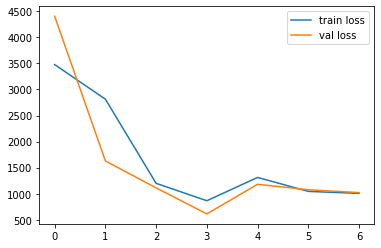

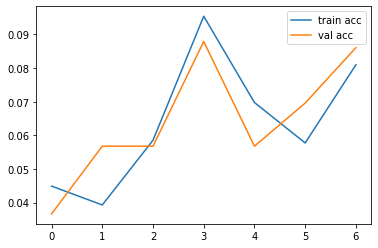

<Figure size 432x288 with 0 Axes>

In [67]:
plt.plot(model_fit.history['loss'], label='train loss')
plt.plot(model_fit.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model_fit.history['accuracy'], label='train acc')
plt.plot(model_fit.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

<b>Saving the Resnet50 Model

In [319]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [320]:
y_pred = model.predict(test_set)

In [321]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 9.9955052e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 3.7378893e-12, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 3.8276737e-10, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 9.9999869e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.3644086e-25, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [322]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [323]:
y_pred

array([ 2,  2, 15, 15,  2, 18, 15,  2,  2,  9, 18,  0,  2,  9, 15,  0,  2,
        9, 18, 18, 18,  2,  2,  2,  9,  9,  2, 15,  2, 15, 18,  9,  9, 15,
        0,  0, 18, 18, 18, 18,  9,  9,  9,  2,  2,  2,  2,  9, 15,  9,  9,
        9, 18, 18,  2,  2,  9, 15, 18,  0,  2,  2, 18,  9,  2,  9,  2,  2,
        9, 18, 18,  2, 18,  2, 15, 18,  9,  2, 18, 18,  2, 18, 18, 15,  2,
        9,  2,  9,  9,  2,  2,  0, 15, 18,  9, 18, 18,  9,  2,  0,  9,  2,
        2,  2,  9,  0, 18, 15,  2,  2,  9,  9, 15, 18,  2, 15, 15, 18,  2,
       15, 15, 18,  2,  2, 18,  2, 15,  0, 15,  0,  2,  9,  2, 18,  0,  0,
       18,  9, 18,  2, 18, 18, 15, 18,  2,  9,  2,  2,  2, 15,  2, 15, 18,
        2, 18, 18, 18,  9, 18, 15, 18, 15, 18,  2,  9,  0, 18,  2,  9, 15,
        9, 18,  2,  9, 18,  9, 18,  0,  2,  2,  2, 18, 18, 18, 15,  2,  9,
       18,  2,  2, 15,  2,  9,  9,  9, 18,  9, 18,  9,  9, 18, 18, 18,  9,
        9,  2, 18, 15,  9,  9,  9,  9, 15,  2,  2,  0,  2, 18,  2,  2,  0,
        2,  0,  2,  9, 18

<b> Confusion Matrix

In [329]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_set , len(training_set))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set .classes, y_pred))
print('Classification Report')
target_names = ['Audi',
 'AustinMartin',
 'Bentley',
 'BMW',
 'BugattiVeyron',
 'Cadillac',
 'Chevrolet',
 'Chrysler',
 'Dodge',
 'Ferrari',
 'FIAT',
 'Honda',
 'Hummer',
 'Hyundai',
 'Jaguar',
 'Jeep',
 'Lamborghini',
 'LandRover',
 'McLaren',
 'Mercedes',
 'Nissan',
 'Porsche',
 'RollsRoyce',
 'Toyota',
 'Volvo']
print(classification_report(test_set .classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 4  0  2  0  0  0  0  0  0  3  0  0  0  0  0  2  0  0  5  0  0  0  0  0
   0]
 [ 4  0 10  0  0  0  0  0  0  6  0  0  0  0  0  4  0  0  5  0  0  0  0  0
   0]
 [ 4  0 14  0  0  0  0  0  0  6  0  0  0  0  0  5  0  0 10  0  0  0  0  0
   0]
 [ 4  0 13  0  0  0  0  0  0  5  0  0  0  0  0  5  0  0  6  0  1  0  0  0
   0]
 [ 5  0  7  0  0  0  0  0  0  3  0  0  0  0  0  4  0  0  6  0  0  0  0  0
   0]
 [ 5  0 10  0  0  0  0  0  0  9  0  0  0  0  0  2  0  0  9  0  0  0  0  0
   0]
 [ 0  0  8  0  0  0  0  0  0  2  0  0  0  0  0  4  0  0  5  0  0  0  0  0
   0]
 [ 3  0  4  0  0  0  0  0  0  3  0  0  0  0  0  1  0  0  6  0  0  0  0  0
   0]
 [ 0  0 11  0  0  0  0  0  0  4  0  0  0  0  0  3  0  0  4  0  0  0  0  0
   0]
 [ 2  0  2  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  4  0  0  0  0  0
   0]
 [ 2  0  4  0  0  0  0  0  0  4  0  0  0  0  0  4  0  0  4  0  0  0  0  0
   0]
 [ 1  0  5  0  0  0  0  0  0  3  0  0  0  0  0  1  0  0  2  0  0  0  0  0
   0]
 [ 1  0  3  0  0  0  0 

<b>2.VGG16

In [330]:
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

Here we should train our layers as we are using the model that is pretrained

In [331]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

<b>Checking the number of output classes

In [332]:
folders = glob('Datasets/train/*')
folders

['Datasets/train\\Audi',
 'Datasets/train\\AustinMartin',
 'Datasets/train\\Bentley',
 'Datasets/train\\BMW',
 'Datasets/train\\BugattiVeyron',
 'Datasets/train\\Cadillac',
 'Datasets/train\\Chevrolet',
 'Datasets/train\\Chrysler',
 'Datasets/train\\Dodge',
 'Datasets/train\\Ferrari',
 'Datasets/train\\FIAT',
 'Datasets/train\\Honda',
 'Datasets/train\\Hummer',
 'Datasets/train\\Hyundai',
 'Datasets/train\\Jaguar',
 'Datasets/train\\Jeep',
 'Datasets/train\\Lamborghini',
 'Datasets/train\\LandRover',
 'Datasets/train\\McLaren',
 'Datasets/train\\Mercedes',
 'Datasets/train\\Nissan',
 'Datasets/train\\Porsche',
 'Datasets/train\\RollsRoyce',
 'Datasets/train\\Toyota',
 'Datasets/train\\Volvo']

In [333]:
len(folders)

25

Here we can observe that there are 25 classes of cars that we can group our images into

<b>Now we need to flatten our layers so that we can add the more number of layers as required by us

In [334]:
x = Flatten()(vgg16.output)

Now we will build our model for prediction and use softmax as our activation function as here we have task of multi-classification rather than binary classification

In [335]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

<b>Now let us see the structure of the model

In [336]:
# view the structure of the model
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)      

Here we have observed the last layer having 25 classes hat we needed

<b>Now we will compile our model and as it is a multiclassifcation we will use our categorical_crossentropy as our loss-metric and adam as our optimizer

In [337]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


<b>Data Augmentation

Here we will try to make our data invariant to all the variances like flip variance,rotational variance,scaling and zooming variance.
Here we are doing the augmentation only for the train data and we are only doing the scaling for test_data.

In [338]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

<b>Now we will try to provide our data from our folders as train and test data

In [339]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (256, 256),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 1247 images belonging to 25 classes.


In [340]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (256, 256),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 546 images belonging to 25 classes.


<b>Fitting the Model

Now we will fit our model to our data.It may take some time but it is far better than training the whole network which needs a high computational power.

In [341]:
#modified
# fit the model
model_fit= model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[terminate,early_stopping_monitor,tensorboard_callback,checkpoint,lrate]
)

Epoch 1/50
20/20 [==============================] - ETA: 0s - loss: 705.8654 - accuracy: 0.0738
Epoch 00001: accuracy did not improve from 0.87516
20/20 [==============================] - 96s 5s/step - loss: 705.8654 - accuracy: 0.0738 - val_loss: 490.8246 - val_accuracy: 0.1447
Epoch 2/50
20/20 [==============================] - ETA: 0s - loss: 242.4473 - accuracy: 0.2606
Epoch 00002: accuracy did not improve from 0.87516
20/20 [==============================] - 101s 5s/step - loss: 242.4473 - accuracy: 0.2606 - val_loss: 176.7523 - val_accuracy: 0.2454
Epoch 3/50
20/20 [==============================] - ETA: 0s - loss: 73.7997 - accuracy: 0.5253
Epoch 00003: accuracy did not improve from 0.87516
20/20 [==============================] - 92s 5s/step - loss: 73.7997 - accuracy: 0.5253 - val_loss: 99.4997 - val_accuracy: 0.3022
Epoch 4/50
20/20 [==============================] - ETA: 0s - loss: 23.9167 - accuracy: 0.7017
Epoch 00004: accuracy did not improve from 0.87516
20/20 [=========

In [220]:
# # fit the model
# model_fit= model.fit_generator(
#   training_set,
#   validation_data=test_set,
#   epochs=10,
#   steps_per_epoch=len(training_set),
#   validation_steps=len(test_set)
# )

<b>Plottting the losses

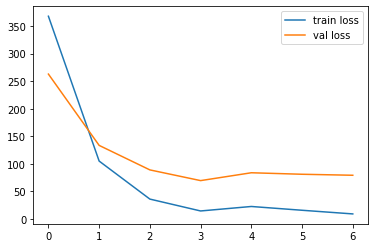

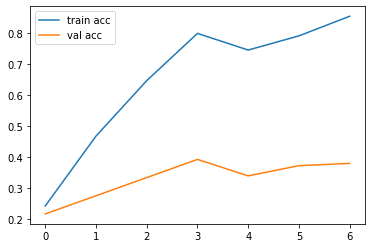

<Figure size 432x288 with 0 Axes>

In [221]:
plt.plot(model_fit.history['loss'], label='train loss')
plt.plot(model_fit.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model_fit.history['accuracy'], label='train acc')
plt.plot(model_fit.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

<b>
Saving the vgg16 Model

In [342]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [343]:
y_pred = model.predict(test_set)

In [344]:
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [345]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [346]:
y_pred

array([17,  4,  8,  9,  8, 22,  9, 20, 16,  8,  4,  4, 11,  9, 13, 16, 16,
       15, 18,  2,  4,  8, 16, 13,  1,  0, 19, 22,  5, 16, 21, 12, 20, 11,
        2,  8,  2,  4, 15, 11, 18, 18, 23, 24,  7,  9, 15,  4, 21, 16,  8,
       21,  8, 22,  7, 15, 16,  7,  8, 17, 12,  4,  7,  8,  4,  8, 15, 12,
       10,  8,  4,  1, 12, 24,  9, 16,  8, 14,  4, 15,  1,  7, 21, 18,  8,
        0, 14, 16,  8,  3,  8,  7,  8,  5, 20, 22,  4, 15, 16, 11, 11, 17,
       12, 13, 23, 20,  8, 23,  8,  9, 12,  8,  8, 13, 16,  7,  9,  1, 13,
       22,  7, 13, 22,  8, 13,  8, 10, 12,  5, 23, 11,  2,  8,  8, 16, 16,
        4, 12, 16, 22, 23,  7,  7, 22,  2,  8,  7,  2,  2,  9, 13, 19, 15,
       20,  7, 14,  8, 22, 18, 22, 13, 12,  7, 20,  8, 23,  4, 15,  4,  0,
       16, 12,  7, 16, 21, 11, 20, 23, 23,  1, 12, 15,  8, 12,  4, 11, 18,
        2, 11,  5,  8,  4, 13, 16,  5, 13,  4, 16,  7, 16, 13, 20,  2, 10,
       16, 12, 20, 23, 17,  7, 18,  7,  2,  9,  8, 21,  8, 23, 12, 11, 11,
        8,  2, 15,  9, 19

<b>Confusion matrix

In [347]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_set , len(training_set))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set .classes, y_pred))
print('Classification Report')
target_names = ['Audi',
 'AustinMartin',
 'Bentley',
 'BMW',
 'BugattiVeyron',
 'Cadillac',
 'Chevrolet',
 'Chrysler',
 'Dodge',
 'Ferrari',
 'FIAT',
 'Honda',
 'Hummer',
 'Hyundai',
 'Jaguar',
 'Jeep',
 'Lamborghini',
 'LandRover',
 'McLaren',
 'Mercedes',
 'Nissan',
 'Porsche',
 'RollsRoyce',
 'Toyota',
 'Volvo']
print(classification_report(test_set .classes, y_pred, target_names=target_names))

Confusion Matrix
[[0 1 0 1 0 1 0 1 1 1 0 1 2 1 1 0 1 0 1 0 1 0 2 0 0]
 [1 0 0 1 3 0 0 3 4 1 0 0 0 0 0 2 2 1 0 1 5 0 3 2 0]
 [1 0 1 2 0 2 0 3 6 2 0 2 2 2 0 2 1 0 2 1 6 2 2 0 0]
 [0 2 1 0 1 1 1 2 5 0 2 0 1 3 1 1 2 0 0 1 8 0 0 2 0]
 [0 2 1 0 0 0 0 1 5 3 1 1 0 2 0 0 1 2 1 2 2 0 1 0 0]
 [2 1 1 0 2 1 1 4 5 0 1 1 4 1 0 3 1 0 1 1 3 0 1 1 0]
 [0 1 0 0 3 0 0 1 1 1 0 2 0 1 0 1 2 2 1 0 0 2 1 0 0]
 [1 0 0 1 2 0 0 1 0 2 2 0 0 1 1 1 3 0 0 0 0 0 1 1 0]
 [0 1 1 0 1 1 0 1 3 1 0 1 1 1 0 1 3 0 0 3 0 0 0 2 1]
 [1 0 0 0 0 1 0 1 3 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 2]
 [0 0 0 1 2 0 0 2 2 0 1 0 2 3 0 0 2 0 0 0 1 1 0 1 0]
 [2 0 0 0 0 1 0 2 1 0 0 0 2 0 0 1 0 0 0 0 1 0 2 0 0]
 [0 0 1 0 0 0 0 0 1 1 1 1 1 2 0 1 0 0 0 0 2 0 1 0 1]
 [0 1 0 0 1 0 0 3 2 0 1 2 0 0 1 0 1 0 1 0 1 1 0 2 1]
 [0 0 2 0 2 0 1 1 1 0 0 2 1 3 0 0 1 0 0 0 1 1 0 0 0]
 [0 2 0 0 2 1 0 2 2 1 0 2 0 0 1 0 2 0 0 0 0 3 0 0 0]
 [1 1 3 1 0 0 0 1 6 3 0 0 5 2 1 1 0 0 0 1 0 1 1 0 2]
 [0 1 1 0 1 1 0 1 1 0 0 1 0 2 0 0 2 0 1 0 2 0 1 1 1]
 [1 0 2 1 0 1 0 5 4 0 0 0 1 2

### VGG19

In [348]:
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

Here we should train our layers as we are using the model that is pretrained

In [349]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

Checking the number of output classes

In [350]:
folders = glob('Datasets/train/*')
folders

['Datasets/train\\Audi',
 'Datasets/train\\AustinMartin',
 'Datasets/train\\Bentley',
 'Datasets/train\\BMW',
 'Datasets/train\\BugattiVeyron',
 'Datasets/train\\Cadillac',
 'Datasets/train\\Chevrolet',
 'Datasets/train\\Chrysler',
 'Datasets/train\\Dodge',
 'Datasets/train\\Ferrari',
 'Datasets/train\\FIAT',
 'Datasets/train\\Honda',
 'Datasets/train\\Hummer',
 'Datasets/train\\Hyundai',
 'Datasets/train\\Jaguar',
 'Datasets/train\\Jeep',
 'Datasets/train\\Lamborghini',
 'Datasets/train\\LandRover',
 'Datasets/train\\McLaren',
 'Datasets/train\\Mercedes',
 'Datasets/train\\Nissan',
 'Datasets/train\\Porsche',
 'Datasets/train\\RollsRoyce',
 'Datasets/train\\Toyota',
 'Datasets/train\\Volvo']

In [351]:
len(folders)

25

Here we can observe that there are 25 classes of cars that we can group our images into

<b>Now we need to flatten our layers so that we can add the more number of layers as required by us

In [352]:
x = Flatten()(vgg19.output)

Now we will build our model for prediction and use softmax as our activation function as here we have task of multi-classification rather than binary classification

In [353]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

<b>Now let us see the structure of our Model

In [354]:
# view the structure of the model
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)      

Here we can observe the last dense layer having the 25 classes that we need

<b>Now we will compile our model and as it is a multiclassifcation we will use our categorical_crossentropy as our loss-metric and adam as our optimizer.

In [355]:
# # tell the model what cost and optimization method to use
# model.compile(
#   loss='categorical_crossentropy',
#   optimizer='adam',
#   metrics=['accuracy']
# )


In [356]:
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

<b>Data Augmentation

Here we will try to make our data invariant to all the variances like flip variance,rotational variance,scaling and zooming variance.
Here we are doing the augmentation only for the train data and we are only doing the scaling for test_data.

In [357]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

Now we will try to provide our data from our folders as train and test data

In [358]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (256, 256),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 1247 images belonging to 25 classes.


In [359]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (256, 256),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 546 images belonging to 25 classes.


<b>Fitting the Model

Now we will fit our model to our data.It may take some time but it is far better than training the whole network which needs a high computational power.

In [360]:
# fit the model
model_fit= model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[terminate,early_stopping_monitor,tensorboard_callback,checkpoint,lrate]
)

Epoch 1/50
20/20 [==============================] - ETA: 0s - loss: 1521.5664 - accuracy: 0.0521
Epoch 00001: accuracy did not improve from 0.87516
20/20 [==============================] - 103s 5s/step - loss: 1521.5664 - accuracy: 0.0521 - val_loss: 4098.8545 - val_accuracy: 0.0330
Epoch 2/50
20/20 [==============================] - ETA: 0s - loss: 2085.9524 - accuracy: 0.0626
Epoch 00002: accuracy did not improve from 0.87516
20/20 [==============================] - 101s 5s/step - loss: 2085.9524 - accuracy: 0.0626 - val_loss: 1864.8409 - val_accuracy: 0.0861
Epoch 3/50
20/20 [==============================] - ETA: 0s - loss: 2007.5856 - accuracy: 0.0545
Epoch 00003: accuracy did not improve from 0.87516
20/20 [==============================] - 98s 5s/step - loss: 2007.5856 - accuracy: 0.0545 - val_loss: 1610.0721 - val_accuracy: 0.0311
Epoch 4/50
20/20 [==============================] - ETA: 0s - loss: 2066.1316 - accuracy: 0.1034
Epoch 00004: accuracy did not improve from 0.87516
2

In [241]:
# # fit the model
# model_fit= model.fit_generator(
#   training_set,
#   validation_data=test_set,
#   epochs=10,
#   steps_per_epoch=len(training_set),
#   validation_steps=len(test_set)
# )

<b>Plotting the losses

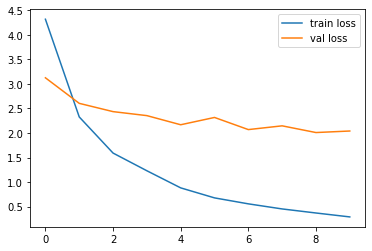

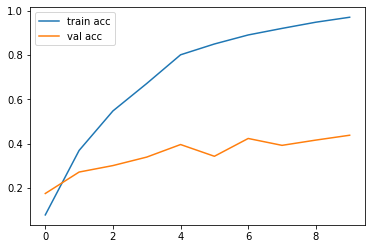

<Figure size 432x288 with 0 Axes>

In [114]:
plt.plot(model_fit.history['loss'], label='train loss')
plt.plot(model_fit.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model_fit.history['accuracy'], label='train acc')
plt.plot(model_fit.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

<b>Saving the VGG19 Model

In [361]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [362]:
y_pred = model.predict(test_set)

In [363]:
y_pred

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 2.0862728e-13],
       [0.0000000e+00, 3.7958831e-05, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [364]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [365]:
y_pred

array([ 0, 18, 21, 16, 18,  4, 21,  5,  7, 21, 17, 21, 22, 15,  7,  0, 14,
       11,  0, 11,  7, 17, 17, 17, 24, 17,  3,  8,  7, 14, 16, 16,  4, 16,
       15, 21, 17, 17,  4,  4, 18,  9,  3,  9,  3, 21,  8,  7,  8,  4,  4,
       18,  4, 21, 18, 17, 11, 21, 16,  7,  7,  8,  0,  4, 17, 11, 16, 15,
       18, 21, 16,  3,  8, 16, 12, 21, 22,  3, 24, 17, 21, 21, 12, 17, 16,
       12,  7,  7, 15,  4, 21, 18,  0,  8, 11, 15,  1, 16,  3,  3, 16,  4,
        7, 22, 21, 14,  8,  4, 22,  7, 24,  7, 24,  9, 22, 16, 17, 16, 17,
       21, 11,  8,  8,  7, 24,  7,  7, 15, 17, 12, 18,  0, 21,  7, 22, 19,
        4,  7, 19, 21,  3,  4,  7, 21,  7,  9, 18,  6, 16,  7,  4, 19, 21,
       22, 17,  4,  7, 16,  6,  4, 18, 21, 18,  7, 22, 11, 15, 11,  7,  1,
       21,  7,  6, 21, 21, 17, 15, 18,  7, 18, 22, 16,  7, 21,  7, 17,  7,
        7,  7, 17,  4, 11,  4, 16,  7, 15,  3,  7,  3,  7, 15, 21,  7, 17,
       12, 17,  7,  3, 12, 15,  4, 21,  7,  6,  8, 18, 21, 21,  7, 10, 14,
       11,  1,  4,  4,  4

<b> Thus I have used models like resnet50,vgg16 and vgg19 but i found that vgg16 is performing well over all other models and it is giving me the better accuracy so i will likely implement this over the other models.

<b> Confusion matrix

In [366]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_set , len(training_set))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set .classes, y_pred))
print('Classification Report')
target_names = ['Audi',
 'AustinMartin',
 'Bentley',
 'BMW',
 'BugattiVeyron',
 'Cadillac',
 'Chevrolet',
 'Chrysler',
 'Dodge',
 'Ferrari',
 'FIAT',
 'Honda',
 'Hummer',
 'Hyundai',
 'Jaguar',
 'Jeep',
 'Lamborghini',
 'LandRover',
 'McLaren',
 'Mercedes',
 'Nissan',
 'Porsche',
 'RollsRoyce',
 'Toyota',
 'Volvo']
print(classification_report(test_set .classes, y_pred, target_names=target_names))

Confusion Matrix
[[0 0 0 0 1 0 0 2 1 1 0 3 0 0 0 2 0 2 1 0 0 3 0 0 0]
 [0 1 0 2 4 0 0 3 3 2 0 1 0 1 0 0 2 1 0 0 0 5 2 0 2]
 [2 1 0 3 3 0 1 9 2 0 0 1 2 0 0 1 4 4 1 0 0 4 1 0 0]
 [0 2 0 2 1 0 0 3 3 1 0 0 2 1 2 3 7 1 0 0 0 2 2 0 2]
 [2 0 0 2 3 0 0 6 0 0 0 3 0 0 0 1 2 0 2 1 0 3 0 0 0]
 [0 1 0 0 3 1 1 7 2 1 2 2 1 0 2 2 1 1 3 1 0 3 1 0 0]
 [1 0 0 4 1 1 0 2 2 0 0 1 0 0 0 0 2 0 1 0 0 4 0 0 0]
 [1 0 0 1 2 0 0 2 2 0 0 0 0 0 1 3 1 1 2 0 0 1 0 0 0]
 [1 0 0 2 5 0 0 1 1 2 0 1 0 0 0 0 1 3 1 0 0 2 1 0 1]
 [0 0 0 0 1 0 0 3 1 0 0 2 0 0 0 1 1 0 1 0 0 0 0 0 0]
 [1 1 0 0 2 0 0 4 0 0 0 0 0 0 0 1 3 1 0 1 0 2 1 0 1]
 [0 0 0 0 1 0 0 2 0 0 0 1 0 0 0 1 0 0 1 0 0 6 0 0 0]
 [0 0 0 0 2 1 1 1 1 0 0 2 0 0 0 1 0 2 0 1 0 1 0 0 0]
 [1 0 0 1 0 1 0 3 0 0 0 2 1 0 0 2 3 0 0 0 0 1 1 0 2]
 [0 0 0 1 1 1 0 2 2 0 0 2 1 0 0 0 2 0 0 1 0 2 1 0 0]
 [0 0 0 0 2 0 0 3 1 0 0 0 2 0 0 4 2 0 1 0 0 1 0 0 2]
 [2 1 0 2 1 0 0 5 0 0 0 3 3 0 0 1 4 4 2 0 0 1 1 0 0]
 [0 0 0 0 1 1 0 3 1 0 0 2 1 0 0 0 1 0 0 2 0 3 1 0 1]
 [0 2 0 1 3 0 0 7 0 1 0 0 0 0

### Results

In [367]:
import pandas as pd
Result_Table = pd.DataFrame({'Model':['Base_model','Resnet-50','VGG-16','VGG-19'],'Accuracy':[0.8,0.09,0.8,0.5],'Val_accuracy':[0.9,0.09,0.4,0.4]})

In [368]:
Result_Table

,Model,Accuracy,Val_accuracy
0,Base_model,0.80,0.90
1,Resnet-50,0.09,0.09
2,VGG-16,0.80,0.40
3,VGG-19,0.50,0.40
